In [189]:
import numpy as np

file_name = "lq_new_pm"

In [190]:
cc_log = list()
emission_log = list()
for line in file(file_name).readlines():
    if line.startswith("Released"):
        cc_log.append(line)
    if line.startswith("The emission stats"):
        emission_log.append(line)

In [65]:
emission_log
# cc_log

['The emission stats are: 211.670594, 1878576.524067, 5416.767902, 6554.039492, 6659.023001\n',
 'The emission stats are: 373.723123, 3316792.720134, 9416.180021, 11733.005604, 11785.265432\n',
 'The emission stats are: 402.035479, 3568064.875693, 9862.392625, 12683.782927, 12595.515588\n',
 'The emission stats are: 398.310829, 3535008.605513, 9518.053929, 12500.897119, 12333.651197\n',
 'The emission stats are: 373.322290, 3313235.320272, 8880.883808, 11816.354911, 11603.073852\n',
 'The emission stats are: 347.589933, 3084860.659607, 8136.399938, 10927.837697, 10693.470278\n',
 'The emission stats are: 320.433655, 2843848.686571, 7415.539704, 10048.926843, 9805.213147\n',
 'The emission stats are: 292.727260, 2597954.433021, 6696.550141, 9157.935717, 8918.366743\n',
 'The emission stats are: 264.931270, 2351265.018668, 6016.422251, 8265.269818, 8039.341842\n',
 'The emission stats are: 238.154399, 2113620.295512, 5358.792674, 7391.026773, 7180.289464\n',
 'The emission stats are: 212

### process emission log

In [172]:
emission_numbers = list()
for line in emission_log:
    words = line.split(":")
    record = words[1]
    numbers = record.split(",")
    emission_numbers.append(numbers)
emision_matrix = np.array(emission_numbers).astype("float64")

In [64]:
emision_matrix

array([[  2.11670594e+02,   1.87857652e+06,   5.41676790e+03,
          6.55403949e+03,   6.65902300e+03],
       [  3.73723123e+02,   3.31679272e+06,   9.41618002e+03,
          1.17330056e+04,   1.17852654e+04],
       [  4.02035479e+02,   3.56806488e+06,   9.86239263e+03,
          1.26837829e+04,   1.25955156e+04],
       ..., 
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00]])

In [19]:
import matplotlib.pyplot as plt

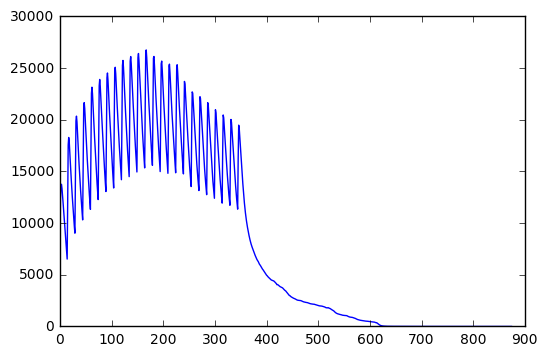

In [107]:
# for i in xrange(3):
plt.plot(emision_matrix[:,2])
plt.show()

In [108]:
f = file("PM_output.csv", "w")
target_number = 24
number = 0
counter = 1
target = 15
cum = 0
for row in emision_matrix:
    if number == target_number:
        break
    if counter == target:
        f.write(",".join([str(e) for e in row]) + "\n")
        cum = 0
        counter = 1
        number = number + 1
    else:
        cum = cum + row
        counter = counter + 1
f.close()

### extract cumulative curve

In [191]:
cummulative_numbers = list()
for line in cc_log:
    words = line.replace(" ", ",").split(",")
#     print words
    if len(words) == 11:
        number = [words[2], words[6], words[10]]
        cummulative_numbers.append(number)
cumulative_matrix = np.array(cummulative_numbers).astype("float64")
print cumulative_matrix

[[  7.59970000e+04   7.59970000e+04   0.00000000e+00]
 [  7.59970000e+04   7.59970000e+04   0.00000000e+00]
 [  7.59970000e+04   7.59830000e+04   1.40000000e+01]
 ..., 
 [  1.72387800e+06   1.00000000e+00   1.72387700e+06]
 [  1.72387800e+06   1.00000000e+00   1.72387700e+06]
 [  1.72387800e+06   0.00000000e+00   1.72387800e+06]]


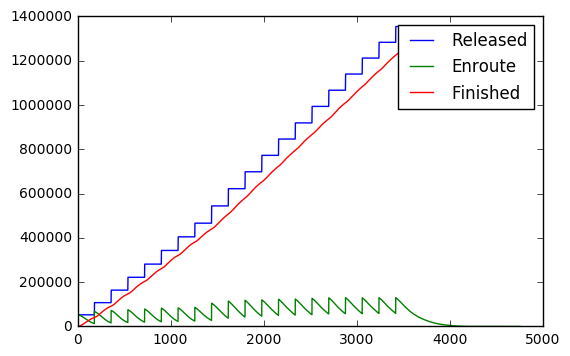

In [178]:
for i in xrange(3):
    plt.plot(cumulative_matrix[:,i])
plt.legend(["Released", "Enroute", "Finished"])
plt.show()

In [132]:
import shapefile

sf = shapefile.Reader("intersection")
shapes = sf.shapes()
fields = sf.fields
records = sf.records()
num_record = len(shapes)

In [192]:
link2zone = dict()
zone2link = dict()
for record in records:
    if np.int(np.float(record[5].strip())) != 0:
        zone_ID = np.int(np.float(record[2]))
        link_ID = np.int(np.float(record[5]))
        if zone_ID not in zone2link.keys():
            zone2link[zone_ID] = [link_ID]
        else:
            zone2link[zone_ID].append(link_ID)
        if link_ID not in link2zone.keys():
            link2zone[link_ID] = [zone_ID]
        else:
            link2zone[link_ID].append(zone_ID)

In [150]:
link2zone
# zone2link

{1902: [3246],
 1903: [3246],
 1905: [3162, 3246],
 1906: [3246],
 1907: [3162],
 1908: [3162, 3246],
 1909: [3162],
 1910: [3162],
 1911: [3162],
 1912: [3162],
 1913: [3162],
 1916: [3161, 3162, 3245],
 1917: [3245, 3246],
 1918: [3245, 3246],
 1919: [3161],
 1920: [3162],
 1921: [3161, 3162],
 1922: [3162],
 1923: [3162],
 1924: [3162],
 1926: [3162],
 1927: [3162],
 1929: [3162],
 1930: [3162],
 1931: [3162],
 1934: [3246],
 1935: [3162, 3246],
 1937: [3246],
 1938: [3246],
 1939: [3162, 3246],
 1941: [3162],
 1942: [3162],
 1943: [3162],
 1944: [3162],
 1947: [3244],
 1948: [3244],
 1949: [3161, 3162],
 1952: [3162],
 1953: [3162],
 1954: [3162],
 1956: [3246],
 1957: [3246],
 1958: [3246],
 1959: [3246],
 1960: [3246],
 1961: [3246],
 1962: [3246],
 1964: [3246],
 1966: [3246],
 1968: [3246],
 1969: [3246],
 1970: [3246],
 1971: [3246],
 1975: [3246],
 1976: [3246],
 1978: [3246],
 1979: [3246],
 1981: [3246],
 1983: [3246],
 1984: [3161, 3245, 3246],
 1987: [3246],
 1988: [3246]

In [193]:
link2emission = dict()
for line in emission_log:
    words = line.split(":")
    record = words[1]
    numbers = record.split(",")
    emission_number = numbers[1:]
    link_ID = np.int(numbers[0])
    if link_ID not in link2emission.keys():
        link2emission[link_ID] = [emission_number]
    else:
        link2emission[link_ID].append(emission_number)
# for 
# emision_matrix = np.array(emission_numbers).astype("float64")


In [152]:
link2emission.keys()
# max(zone2link.keys())

[103774,
 103775,
 103776,
 103786,
 104753,
 103789,
 103790,
 103794,
 103795,
 103797,
 103805,
 103806,
 103809,
 103811,
 103814,
 103815,
 103818,
 103820,
 103821,
 103822,
 103823,
 104760,
 103837,
 103844,
 103847,
 103848,
 104765,
 103852,
 17476,
 104769,
 103890,
 16521,
 103903,
 16522,
 16524,
 103906,
 16525,
 103909,
 103915,
 103918,
 103920,
 103921,
 103926,
 16546,
 16547,
 16550,
 16551,
 103949,
 103950,
 16571,
 103962,
 6586,
 103964,
 114893,
 103974,
 103976,
 103979,
 103980,
 17903,
 103988,
 12047,
 103994,
 103995,
 103996,
 103998,
 104006,
 104007,
 104013,
 104023,
 16646,
 6599,
 16649,
 104031,
 104032,
 16651,
 104802,
 104041,
 16663,
 16666,
 104052,
 104059,
 16683,
 16684,
 16687,
 6777,
 104076,
 104082,
 1902,
 1903,
 1905,
 1906,
 1909,
 1910,
 1912,
 1913,
 1916,
 1917,
 1918,
 1919,
 1920,
 1921,
 1923,
 1924,
 1926,
 1927,
 1929,
 1930,
 1934,
 1935,
 1937,
 1938,
 1939,
 1941,
 1942,
 1943,
 1944,
 1949,
 1952,
 1953,
 1956,
 1957,
 1958

In [194]:
zone2emission = dict()
for zone_ID in zone2link.keys():
#     print zone_ID
    link_list = zone2link[zone_ID]
    zone2emission[zone_ID] = 0.0
    for link_ID in link_list:
        if link_ID in link2emission.keys():
            zone2emission[zone_ID] = zone2emission[zone_ID] + (np.array(link2emission[link_ID]).astype("float64"))/np.float(len(link2zone[link_ID]))
        link_ID = link_ID + 100000
        if link_ID in link2emission.keys():
            zone2emission[zone_ID] = zone2emission[zone_ID] + (np.array(link2emission[link_ID]).astype("float64"))/np.float(len(link2zone[link_ID - 100000])) 

In [153]:
zone2emission

{24: 0.0, 25: 0.0, 29: array([[ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,

In [195]:
f = file("pm_result_zone.csv", "w")
for zone_ID in zone2emission.keys():
    if type(zone2emission[zone_ID]) == float:
        continue
    f.write(str(zone_ID) + "\n")
    for row in zone2emission[zone_ID][0:24]:
        f.write(",".join([str(e) for e in row]) + "\n")
f.close()